In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import h5py
import numpy as np

In [4]:
#I want to try to isolate the stellar halo
#First, load the stars and halo data

f_part_star = h5py.File('../m12i_res_7100_cdm/output/snapshot_600.stars.hdf5')
f_part_star['PartType4'].keys()

[u'Coordinates',
 u'Masses',
 u'Metallicity',
 u'ParticleIDs',
 u'StellarFormationTime',
 u'Velocities']

In [5]:
h = 0.702

print f_part_star['PartType4']['Coordinates'][:]
print f_part_star['PartType4']['Masses'][:]

star_pos = f_part_star['PartType4']['Coordinates'][:]/h
star_mass =  f_part_star['PartType4']['Masses'][:]*1.0e10/h

[[29390.45551503 30974.60844483 32474.91285661]
 [29390.46749319 30974.6001038  32474.91179972]
 [29390.45867406 30974.59421309 32474.95876042]
 ...
 [29971.15768577 32842.36179433 33040.33661848]
 [29957.23867201 32815.97384465 33023.10220705]
 [29987.00823465 32836.13641964 33013.54541205]]
[9.12609721e-07 4.30626301e-07 7.48808702e-07 ... 3.40458627e-07
 3.36659383e-07 3.73704552e-07]


In [6]:
f_halo = h5py.File('../m12i_res_7100_cdm/halo_600.hdf5')
f_halo.keys()

[u'accrete.rate',
 u'accrete.rate.100Myr',
 u'accrete.rate.tdyn',
 u'am.phantom',
 u'am.progenitor.main',
 u'axis.b_div.by_a',
 u'axis.c_div.by_a',
 u'cosmology:baryon.fraction',
 u'cosmology:hubble',
 u'cosmology:n_s',
 u'cosmology:omega_baryon',
 u'cosmology:omega_curvature',
 u'cosmology:omega_dm',
 u'cosmology:omega_lambda',
 u'cosmology:omega_matter',
 u'cosmology:sigma_8',
 u'cosmology:w',
 u'descendant.snapshot',
 u'host.distance',
 u'host.index',
 u'host.velocity',
 u'host.velocity.rad',
 u'host.velocity.tan',
 u'id',
 u'infall.first.mass',
 u'infall.first.snapshot',
 u'infall.first.vel.circ.max',
 u'infall.mass',
 u'infall.snapshot',
 u'infall.vel.circ.max',
 u'info:baryonic',
 u'info:box.length',
 u'info:box.length_div.by_h',
 u'info:dark.particle.mass',
 u'info:gas.particle.mass',
 u'info:host.number',
 u'major.merger.snapshot',
 u'mass',
 u'mass.180m',
 u'mass.200c',
 u'mass.200m',
 u'mass.500c',
 u'mass.bound',
 u'mass.half.snapshot',
 u'mass.lowres',
 u'mass.peak',
 u'mas

1.018532790272
[41875.758 44122.38  46257.492]


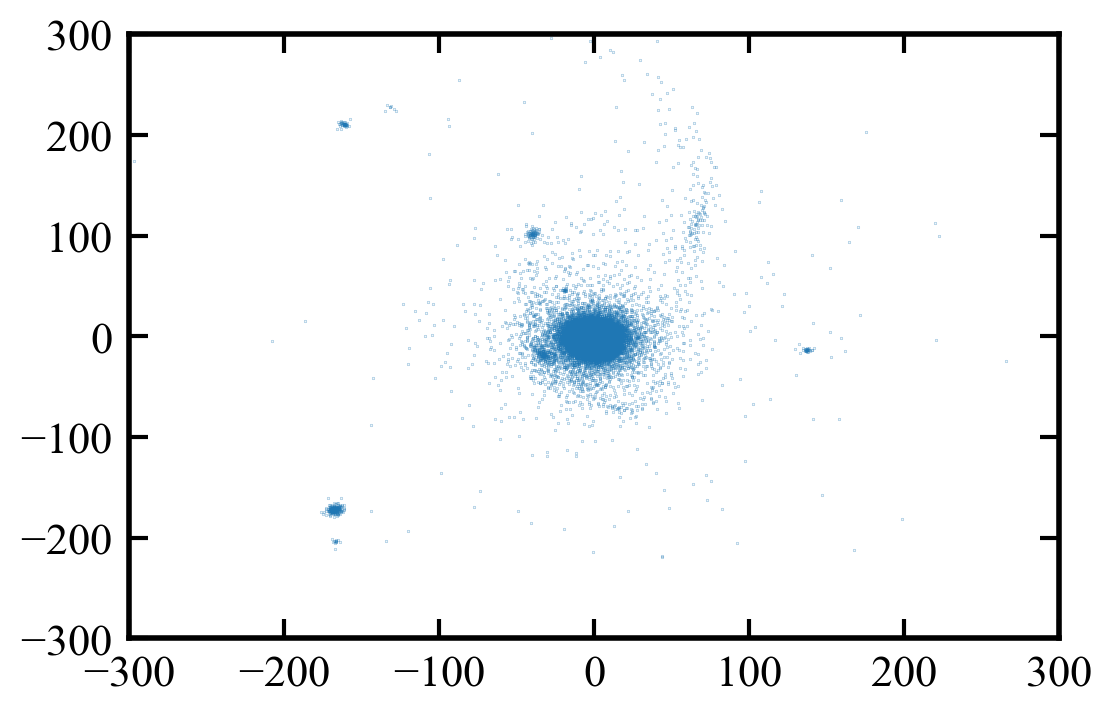

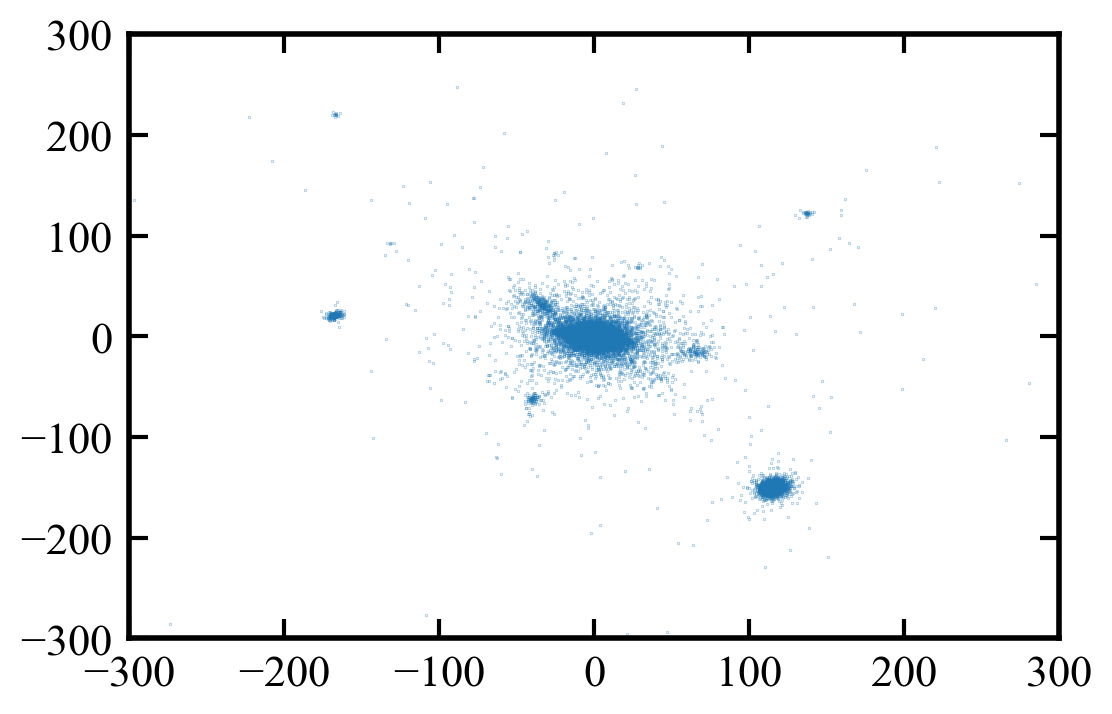

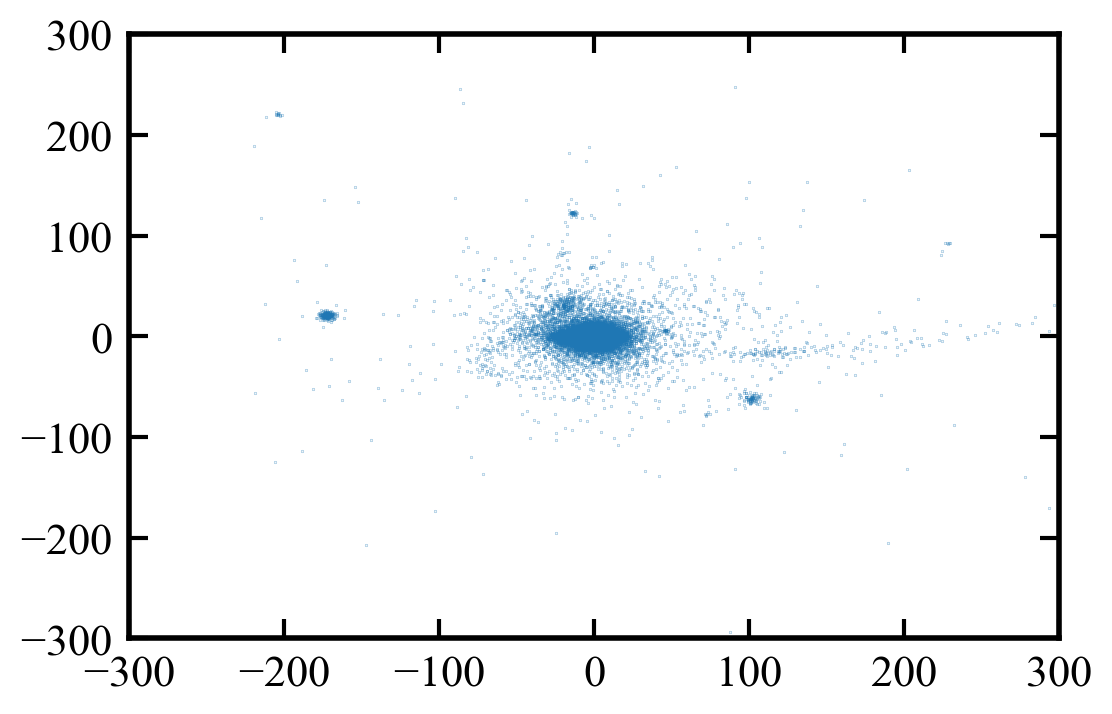

In [37]:
pos_halo = f_halo['position'][:]
mass_halo = f_halo['mass'][:]

host_id = np.argmax(mass_halo)

print mass_halo[host_id]/1.0e12
print pos_halo[host_id]

host_mass = mass_halo[host_id]
host_pos = pos_halo[host_id]

x_star = star_pos[:,0]-host_pos[0]
y_star = star_pos[:,1]-host_pos[1]
z_star = star_pos[:,2]-host_pos[2]

plt.scatter(x_star[::100],y_star[::100],s=0.01)
plt.xlim([-300.0,300.0])
plt.ylim([-300.0,300.0])
plt.show()

plt.scatter(x_star[::100],z_star[::100],s=0.01)
plt.xlim([-300.0,300.0])
plt.ylim([-300.0,300.0])
plt.show()

plt.scatter(y_star[::100],z_star[::100],s=0.01)
plt.xlim([-300.0,300.0])
plt.ylim([-300.0,300.0])
plt.show()

[13000.13847759  6134.27778975 10666.790629   ...  4849.8379861
  4795.71770709  5323.42666308]


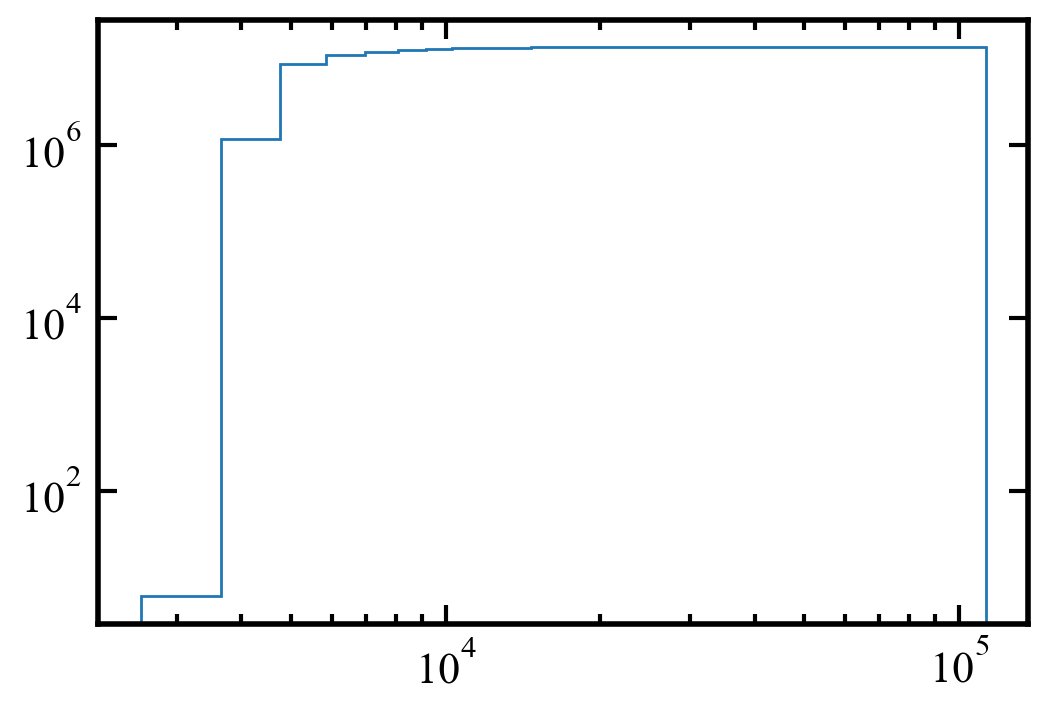

6231.882400749961 2523.9089128653873


In [13]:
print star_mass

plt.hist(star_mass,bins=100,histtype='step',normed=False,cumulative=True)
plt.xscale('log')
plt.yscale('log')
plt.show()

print np.mean(star_mass), np.std(star_mass)

In [ ]:
#remove stars outside of 300 kpc
#stars wthin 10 kpc of the center
#and stars within Rvir of the satellites

dist = np.linalg.norm(star_pos-host_pos,axis=1)

pos_halo = f_halo['position'][:]
mass_halo = f_halo['mass'][:]
radius_halo = f_halo['radius'][:]

dist_halo = np.linalg.norm(pos_halo-host_pos,axis=1)

sat_mask = (dist_halo<300.0)&(dist_halo>0.0)&(mass_halo>1.0e7)

sat_pos = pos_halo[sat_mask]
sat_rad = radius_halo[sat_mask]

stellar_halo_mask_one = (dist>10.0)&(dist<300.0)

dwarf_dist_mask_tot = np.ones_like(dist)*True

print len(sat_rad)

for jj in range(len(sat_rad)):
    print jj
    dwarf_pos = sat_pos[jj]
    dwarf_rad = sat_rad[jj]
    
    dwarf_dist = np.linalg.norm(star_pos-dwarf_pos,axis=1)
    #False if it's IN the satellite
    dwarf_dist_mask = (dwarf_dist>dwarf_rad)
    
    dwarf_dist_mask_tot = dwarf_dist_mask_tot*dwarf_dist_mask   

789
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


IndexError: arrays used as indices must be of integer (or boolean) type

In [70]:
dwarf_dist_mask_tot_bool = map(bool,dwarf_dist_mask_tot)
stars_in_sats = star_pos[dwarf_dist_mask_tot_bool&(dist<300.0)&(dist>10.0)]    

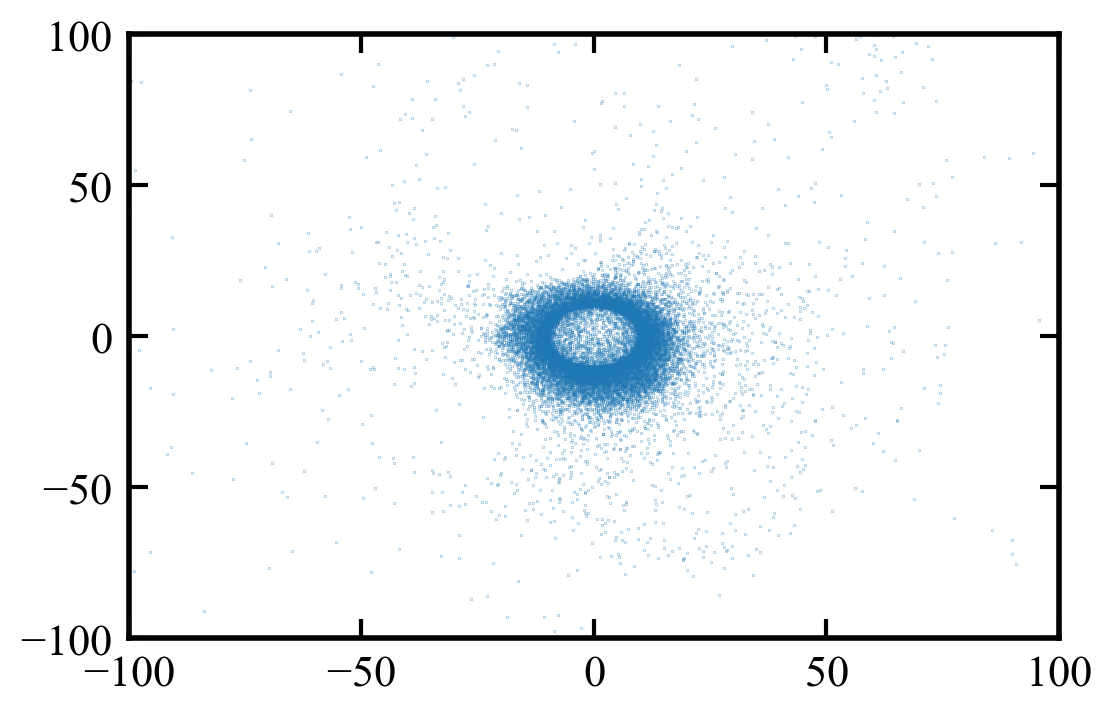

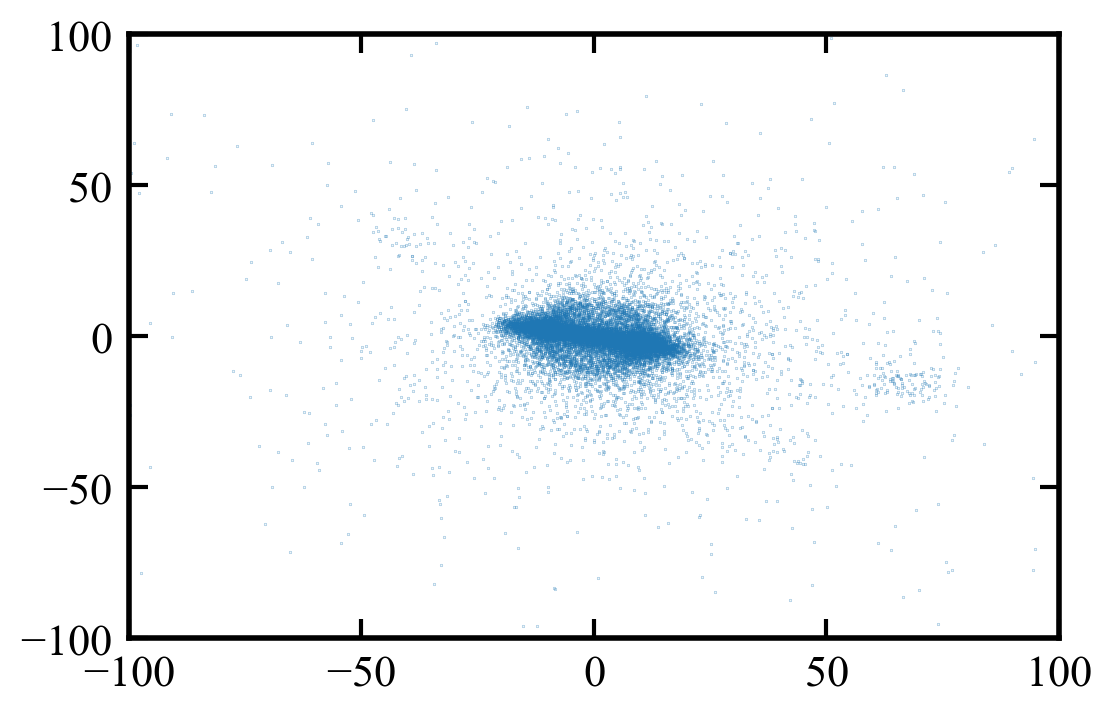

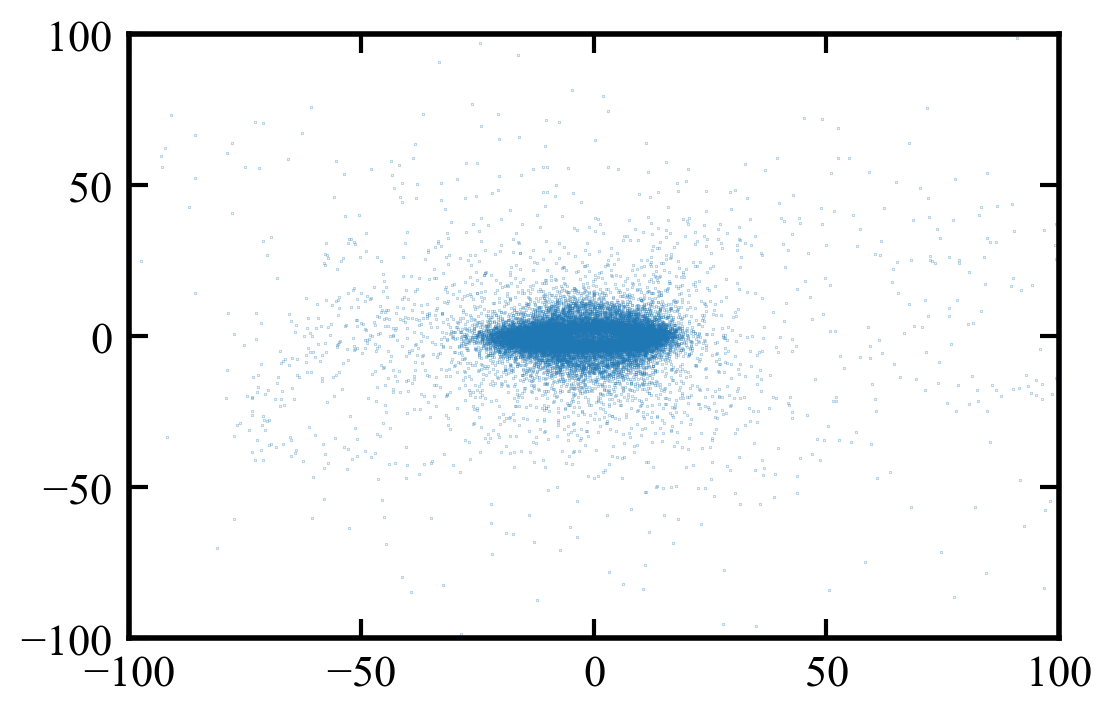

In [72]:
x_star = stars_in_sats[:,0]-host_pos[0]
y_star = stars_in_sats[:,1]-host_pos[1]
z_star = stars_in_sats[:,2]-host_pos[2]

plt.scatter(x_star[::100],y_star[::100],s=0.01)
plt.xlim([-100.0,100.0])
plt.ylim([-100.0,100.0])
plt.show()

plt.scatter(x_star[::100],z_star[::100],s=0.01)
plt.xlim([-100.0,100.0])
plt.ylim([-100.0,100.0])
plt.show()

plt.scatter(y_star[::100],z_star[::100],s=0.01)
plt.xlim([-100.0,100.0])
plt.ylim([-100.0,100.0])
plt.show()

In [ ]:
#load up the data for the halos
M_halo = f_halo[‘mass’][:]
pos_halo = f_halo[‘position’][:]
rad_halo = f_halo[‘radius’][:]

#identify the host halo (the most massive halo) 
#because we need its position to identify the satellites
host_id = np.argmax(M_halo)
host_pos = pos_halo[host_id]
print host_pos
halo_dist = np.sqrt((host_pos[0]-pos_halo[:,0])**2.0+
                    (host_pos[1]-pos_halo[:,1])**2.0+
                    (host_pos[2]-pos_halo[:,2])**2.0)

#Now We want to identify the satellites so construct a mask
#that selects out everything outside Rvir and larger than
#zero to remove the host halo itself
sat_mask = (halo_dist<300.0)&(halo_dist>0.)

#mask out the position and radii of the satellites
M_sat = M_halo[sat_mask]
pos_sat = pos_halo[sat_mask]
rad_sat = rad_halo[sat_mask]

#find the largest satellite of the Milky Way by using argmax again
large_sat = np.argmax(M_sat)
print M_sat[large_sat]/1.0e10, pos_sat[large_sat]
large_sat_pos = pos_sat[large_sat]
large_sat_rad = rad_sat[large_sat]

#Now calculate the distance between the satellite center and
#every star particle
sat_dist = np.sqrt((large_sat_pos[0]-coords[:,0])**2.0+
                    (large_sat_pos[1]-coords[:,1])**2.0+
                    (large_sat_pos[2]-coords[:,2])**2.0)

#mask out all the stars within the virial radius of the largest satellite
large_sat_mask = (sat_dist>large_sat_rad)
plt.scatter(dist[dist_mask&large_sat_mask][::10],Fe_H[dist_mask&large_sat_mask][::10], s=0.02,rasterized=True)